# СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

План работы состоит из следующих пунктов:
- изучение общей информации о данных
- предобработка данных, где меняется тип данных при необходимости, а таккже датафреймы проверяются на наличие пропусков и дубликатов
- проведение исследовательского анализа данных, в котром описывается и визуализируется общая информация
- объединение данных
- проведение статистического анализа
- проверка гипотез
- заключение

### 1 Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

try:
    users = pd.read_csv("C:/Users/Любовь/Downloads/users_go.csv")
    rides = pd.read_csv("C:/Users/Любовь/Downloads/rides_go.csv")
    subscriptions = pd.read_csv("C:/Users/Любовь/Downloads/subscriptions_go.csv")

except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [2]:
users.head() #выводим первые 5 строк набора данных

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info() #выводим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод**: по предварительным данным видно, что в датафреймах нет пропусков. В некоторых данных надо изменить тип, а также проверить все на наличие дубликатов. Можно приступать к предобработке.

### 2 Предобработка данных

In [8]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') #преобразовали тип данных во временной

In [9]:
rides['month'] = rides['date'].dt.month #добавили столбец с номером месяца

In [10]:
users.duplicated().sum() #найдем количество дубликатов

31

In [11]:
users.drop_duplicates(inplace=True) #удалили дубликаты и перезаписали датафрейм
users.reset_index(drop=True) #обновили индесы и удалили старые

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [12]:
rides.duplicated().sum()

0

In [13]:
subscriptions.duplicated().sum()

0

**Вывод**: пропущенных значений в наборах данных нет, однако был обнаружен и удален 31 дубликат в датафрейме о пользователях сервиса. Также в столбце с датой поездки был изменен тип на подходящий и добавлен столбец с номером месяца.

### 3 Исследовательский анализ данных

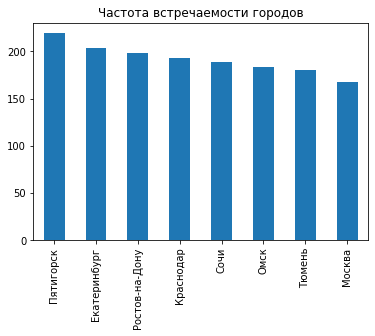

In [14]:
(
    users['city'].value_counts().plot(
        kind='bar', ylabel='', title='Частота встречаемости городов')
);

**Вывод**: судя из столбчатой диаграммы, распределение пользователей по городам примерно одинаково, чуть больше пользователей в Пятигорске и меньше в Москве, но разница невелика.

In [15]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [16]:
shape_free = users.loc[users['subscription_type'] == 'free', 'subscription_type'].count()/users['subscription_type'].count() #находим долю людей без подписки
(shape_free*100).round(2).astype(str) + '%' #переводим в проценты

'54.43%'

In [17]:
shape_ultra = 1 - shape_free #находим долю пользователей с подпиской
(shape_ultra*100).round(2).astype(str) + '%'

'45.57%'

**Вывод**: из процентного соотношения видно, что пользователей без подписки чуть больше, чем тех, кто ее оформил.

<AxesSubplot:title={'center':'Распределение пользователей по возрасту'}, ylabel='Frequency'>

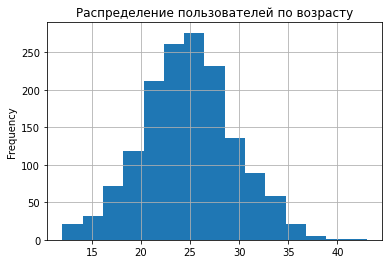

In [37]:

(
    users['age'].plot(
        kind='hist', bins=15, title='Распределение пользователей по возрасту', xlabel='Возраст', ylabel='Количество', grid=True
    )
);


**Вывод**: из гистограммы можно сделать вывод, что чаще всего сервисом аренды самокатов пользуются люди от 20 до 30 лет.

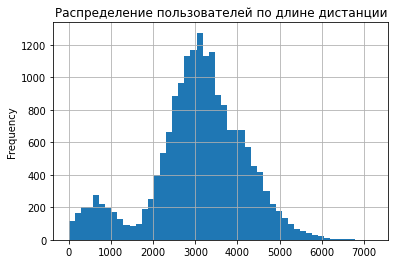

In [19]:
(
    rides['distance'].sort_values().plot
    (
        kind='hist', bins=50, title='Распределение пользователей по длине дистанции', xlabel='Дистанция (в метрах)', ylabel='Кол-во пользователей', grid=True
    )
);

<AxesSubplot:>

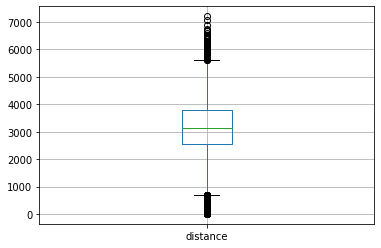

In [20]:
rides.boxplot(column='distance')

In [21]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод**: из гистограммы видно, что чаще всего встречаются пользователи, которые преодолевают дистанцию на самокате в среднем 2500-3500 метров. Это подтверждается и диаграммой размаха. Поездки можно считать короткими, если их расстояние составляет меньше 2543 метров, длинными - больше 3776 метров. Также за счет "усов" отсекаются аномально короткие (меньше 700 метров) и длинные (больше 5700 метров) расстояния за поездку.

<AxesSubplot:>

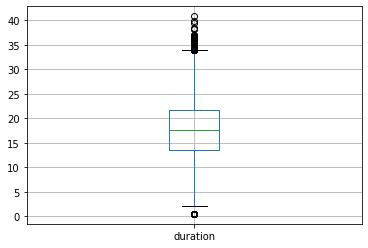

In [22]:
rides.boxplot(column='duration')   

In [23]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [24]:
dropped = rides[rides['duration'] == 0.5].index
rides.drop(dropped, inplace=True)

**Вывод**: средняя продолжительность поездки составляет 17 минут, короткие поездки длятся меньше 13 минут, а долгие - больше 21 минуты. Также из диаграммы размаха видно, что поездки продолжительностью 0.5 минуты и более 34 минут выбиваются из общего списка.

Это навело на мысль проверить подозрительно маленькие поездки в 30 секунд - всего в датафрейме их 95 штук из 18068, то есть меньше 1% данных. Так как нет возможности уточнить информацию этого пика у руководства, принимаю решение удалить эти значения, принимая их за логическую ошибку.

**Выводы**: в результате анализа были описаны и визуализированы некоторые показатели.
- частота встречаемости городов, в которых зарегестрированы пользователи, распределена примерно равномерно
- пользователей, не оформивших подписку немного больше - 54.43% от общего числа
- возраст пользователей в среднем составляет от 20 до 30 лет, однако есть как 10-летние, так и 40-летние "самокатчики"
- расстояние, которое в среднем преодолевается за поездку, лежит в диапазоне от 2543 до 3776 метров
- продолжительность поездки в среднем составляет 15-20 минут.35

### 4 Объединение данных

In [25]:
full = users.merge(rides) #объединили таблицу пользователей и поездок
full = full.merge(subscriptions) #объединили предыдущую таблицу с таблицей подписок
full

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [26]:
full['duration'] = np.ceil(full['duration']) #округлила продолжительность поездок методом "потолок"

In [27]:
with_sub = full.query('subscription_type == "ultra"') #создали датафрейм с пользователями, имещими подписку на сервис
without_sub = full.query('subscription_type == "free"') #создали датафрейм с пользователями без подписки

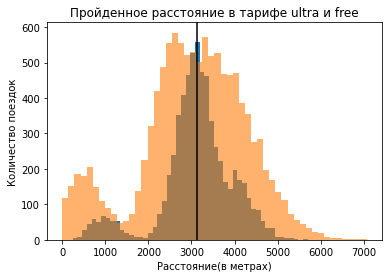

In [28]:
import matplotlib.pyplot as plt
plt.hist(with_sub['distance'], bins = 50)
plt.title('Пройденное расстояние в тарифе ultra и free')
plt.xlabel('Расстояние(в метрах)')
plt.ylabel('Количество поездок')
plt.hist(without_sub['distance'], bins = 50, alpha=0.6)
plt.axvline(full['distance'].median(), color='k')
plt.show()

**Вывод**: у пользователей с подпиской и без примерно похожие графики и пики на них, медианное значение находится примерно в точке 3100 метров. Однако, пользователи без подписки чаще ездят на удаленные расстояния.

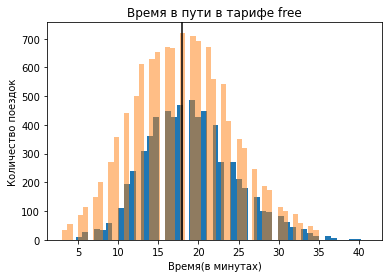

In [29]:
plt.hist(with_sub['duration'], bins = 50)
plt.title('Время в пути в тарифе ultra')
plt.xlabel('Время(в минутах)')
plt.ylabel('Количество поездок')
plt.hist(without_sub['duration'], bins = 50, alpha=0.5)
plt.title('Время в пути в тарифе free')
plt.axvline(full['duration'].median(), color = 'k')
plt.show()

**Вывод**: пользователи с подпиской и без тратят примерно одинаковое время на путь - в среднем от 10 до 25 минут. Медианное время составляет примерно 18 минут.

**Выводы**: в ходе работы 3 изначальных набора данных были объединены в 1 датафрейм и разбит по двум категориям - пользователей с платной и бесплатной подпиской. Выяснилось, что обе категории тратят примерно одинаковое время на поездку, но люди без подписки ездят на более далекие дистанции.

### 5 Подсчет выручки

In [30]:
agg_data = full.pivot_table(index=['month', 'user_id'], values=['distance','name','duration', 'subscription_type'], aggfunc={'distance' : 'sum', 'duration' : 'sum', 'name' : 'count', 'subscription_type' : 'max'}) #создала сводную таблицу с нужными показателями 
agg_data.head() #вывела первые 5 строк датафрейма

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra

In [31]:
agg_data = agg_data.rename(columns = {'name' : 'count'}) #переименовала столбец

In [32]:
#создаем собственную функцию для вычисления помесячной выручки
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return (199 + 6 * row['duration'])
    if row['subscription_type'] == 'free':
        return (50 + 8 * row['duration'])
    return 'тариф не определён'

In [39]:
agg_data['monthly_revenue'] = agg_data.apply(revenue, axis=1) #добавили столбец
agg_data.sort_values(by='monthly_revenue', ascending=False).head(20) #вывели таблицу, отсортировав по наибольшей выручке

distance  duration  count subscription_type  \
month user_id                                                    
1     1471     23098.193122     143.0      6              free   
12    715      22712.450389     131.0      6              free   
5     1083     23429.487786     129.0      7              free   
4     1424     21527.849820     124.0      7              free   
1     1383     20653.334199     123.0      6              free   
3     1196     17991.776785     121.0      6              free   
12    1149     18449.375290     116.0      5              free   
3     617      20009.704886     126.0      6             ultra   
      991      18244.387063     113.0      5              free   
7     944      17647.951688     112.0      5              free   
2     941      16300.003905     111.0      5              free   
5     938      19061.395847     111.0      6              free   
12    894      15960.599939     109.0      5              free   
1     730      22666.615624     108.0      5              free   
5     1419     16629.100261     108.0      5              free   
7     1307     17127.531763     107.0      5              free   
6     957      16389.479250     106.0      5              free   
9     1246     17670.402934     106.0      6              free   
5     171      16135.757358     116.0      5             ultra   
11    933      16327.334631     103.0      4              free   

               monthly_revenue  
month user_id                   
1     1471              1194.0  
12    715               1098.0  
5     1083              1082.0  
4     1424              1042.0  
1     1383              1034.0  
3     1196              1018.0  
12    1149               978.0  
3     617                955.0  
      991                954.0  
7     944                946.0  
2     941                938.0  
5     938                938.0  
12    894                922.0  
1     730                914.0  
5     1419               914.0  
7     1307               906.0  
6     957                898.0  
9     1246               898.0  
5     171                895.0  
11    933                874.0

**Вывод**: был создан отдельный датафрейм с агрегирующими данными, туда же добавлен столбец с помесячной выручкой. Она была рассчитана для пользователей с подпиской на сервис и без нее по соответствующим формулам.

### 6 Проверка гипотез

##### 1 гипотеза 
**Необходимо проверить**: тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

H0: Время поездки у подписчиков равно времени поездки у пользователей без подписки

H1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без нее

In [34]:
ultra = with_sub['duration']
free = without_sub['duration']

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


**Вывод**: проверили гипотезу о времени на поездки у пользователей, получилось отвергнуть, что они равны. Можно предполагать, что пользователи с подпиской тратят на поездки больше времени.

##### 2 гипотеза 
**Необходимо проверить**: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

H0: Среднее расстояние поездки у пользователя с подпиской составляет 3130 метров

H1: Среднее расстояние поездки у пользователя с подпиской больше 3130 метров

In [35]:
ultra_distance = with_sub['distance']
mean_distance = 3130

alpha = 0.05

results = st.ttest_1samp(ultra_distance, mean_distance, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод**: не получилось отвергнуть гипотезу о том, что расстояние поездки у пользователей с подпиской равно 3130 метров. Так как гипотеза односторонняя, можно считать, что среднее расстояние не больше этого значения.

##### 3 гипотеза 
**Необходимо проверить**: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

H0: Помесячные выручки от пользователей с подпиской и без нее равны

H1: Помесячная выручка от пользователей с подпиской выше, чем без нее

In [36]:
ultra_revenue = agg_data.query('subscription_type == "ultra"')['monthly_revenue']
free_revenue = agg_data.query('subscription_type == "free"')['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(ultra_revenue, free_revenue, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.029098397097659e-176
Отвергаем нулевую гипотезу


**Вывод**: отвергаем нулевую гипотезу, а значит можно предполгать, что помесячная выручка от пользователей с подпиской выше, чем без нее.

##### 4 гипотеза 
Чтобы проверить гипотезу о том, стало ли меньше обращений в поддержку после обновления, понадобится применить метод st.ttest_rel(). Он преднозначен для проверки зависимых выборок.

Н0: обращений после обновления столько же, сколько было и до него

Н1: обращений после обновления стало меньше, чем до него

**Выводы**: в результате проверки первой гипотезы выяснили, что пользователи с подпиской тратят на поездки больше времени.
После проверки второй гипотезы сделали вывод, что среднее расстояние, которое проезжают пользователи, не больше 3130 метров.
Проверка третей гипотезы дала нам понять, что подписчики сервиса приносят ему больше помесячной выручки.

### 7 Общие выводы

В процессе статистического анализа данных были выполнены следующие этапы, а также сделаны выводы по ним:
1. Изучили общую информацию о данных
 - в данных 3 датафрейма с 1565, 18068 и 2 строками соотвественно. Ни в одном из них нет пропущенных значений
 - в некоторых данных надо изменить тип, а также проверить все на наличие дубликатов
2. Осуществили предобработку данных
 - обнаружили и удалили 31 дубликат в датафрейме о пользователях сервиса
 - в столбце с датой поездки изменили тип на подходящий и добавили столбец с номером месяца
3. Провели исследовательский анализ данных
 - частота встречаемости городов, в которых зарегестрированы пользователи, распределена примерно равномерно
 - пользователей, не оформивших подписку немного больше - 54.43% от общего числа
 - возраст пользователей в среднем составляет от 20 до 30 лет, однако есть как 10-летние, так и 40-летние "самокатчики"
 - расстояние, которое в среднем преодолевается за поездку, лежит в диапазоне от 2543 до 3776 метров
 - продолжительность поездки в среднем составляет 15-20 минут
4. Объединили данные
 - в ходе работы 3 изначальных набора данных были объединены в 1 датафрейм и разбит по двум категориям - пользователей с платной и бесплатной подпиской
 - обе категории тратят примерно одинаковое время на поездку, но люди без подписки ездят на более далекие дистанции
5. Посчитали выручку
 - был создан отдельный датафрейм с агрегирующими данными, туда же добавлен столбец с помесячной выручкой
 - выручка была рассчитана для пользователей с подпиской на сервис и без нее по соответствующим формулам   
6. Проверили гипотезы
 - в результате проверки первой гипотезы выяснили, что пользователи с подпиской тратят на поездки больше времени
 - после проверки второй гипотезы сделали вывод, что среднее расстояние, которое проезжают пользователи, не больше 3130 метров
 - проверка третей гипотезы дала нам понять, что подписчики сервиса приносят ему больше помесячной выручки
 - четвертую гипотезу можно проверить методом для зависимых выборок st.ttest_rel().гипотез